# Vaidya metric as from litrature

In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()

### Defining our time dependent metric as from equation 31
https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

https://en.wikipedia.org/wiki/Vaidya_metric

In [3]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
a = M*(1 + w*syms[0])
print(a)
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - (2*a / syms[1]))* (c ** 2)
list2d[0][1] = c
list2d[1][0] = c
list2d[1][1] = 0 
list2d[2][2] = 1 * (syms[1] ** 2) 
list2d[3][3] = 1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


M*(t*w + 1)


⎡ 2 ⎛2⋅M⋅(t⋅w + 1)    ⎞                   ⎤
⎢c ⋅⎜───────────── - 1⎟  c  0       0     ⎥
⎢   ⎝      r          ⎠                   ⎥
⎢                                         ⎥
⎢          c             0  0       0     ⎥
⎢                                         ⎥
⎢                            2            ⎥
⎢          0             0  r       0     ⎥
⎢                                         ⎥
⎢                                2    2   ⎥
⎣          0             0  0   r ⋅sin (θ)⎦

### Calculating the Einstein Tensor (with both indices covariant)

In [4]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡2⋅M⋅c⋅w         ⎤
⎢───────  0  0  0⎥
⎢    2           ⎥
⎢   r            ⎥
⎢                ⎥
⎢   0     0  0  0⎥
⎢                ⎥
⎢   0     0  0  0⎥
⎢                ⎥
⎣   0     0  0  0⎦

In [5]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡2⋅M⋅c⋅w         ⎤
⎢───────  0  0  0⎥
⎢    2           ⎥
⎢   r            ⎥
⎢                ⎥
⎢   0     0  0  0⎥
⎢                ⎥
⎢   0     0  0  0⎥
⎢                ⎥
⎣   0     0  0  0⎦

In [6]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr




In [7]:
# what is the Weyl tensor?
#weyl = WeylTensor.from_metric(sch)
#weyl.tensor() # all components!

(t, r, theta, phi, M, c, w)


ValueError: x and y must have same first dimension, but have shapes (463,) and (1,)

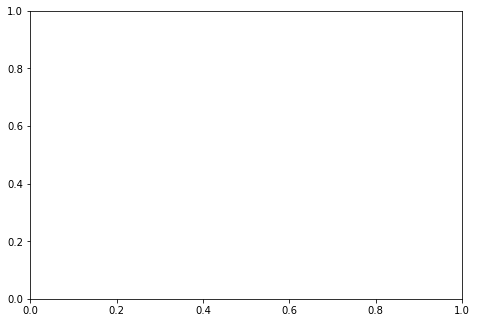

In [8]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1, 1)[0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1, 1)[0][1]
z = -func(1.0,x,1, 1, 1, 1, 1)[0][0] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


